# Tres partículas en red de resortes

[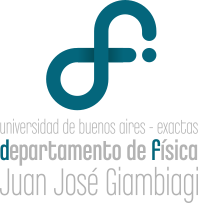](https://www.df.uba.ar/)

[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado
Considere el sistema de la figura, en la que los resortes verticales tienen longitud natural $l_0$ y constante $k_1$, y los horizontales $a_0= 0$ (son *slinkies*) y $k_2$.
Calcule las frecuencias propias y los modos normales.   
![](figuras/ej1-10.png)

## Energía potencial

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

import warnings
warnings.filterwarnings("ignore")

In [2]:
t = sym.Symbol('t')
m, k, l0, d, L = sym.symbols('m, k, l_0, d, L', positive= True) # parámetros físicos

psiax, psiay, psibx, psiby, psicx, psicy = mech.dynamicsymbols(
    '\psi_{ax}, \psi_{ay}, \psi_{bx}, \psi_{by}, \psi_{cx}, \psi_{cy},') # funciones de t

In [3]:
# Coordenadas de las partículas
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas
r_a = (d+ psiax)* N.x + psiay* N.y
r_b = (2*d + psibx)* N.x + psiby* N.y
r_c = (3*d + psicx)* N.x + psicy* N.y

Para los resortes longitudinales (horizontales en el equilibrio) la tenemos sencilla pues son *slinkies*.
Su $$
V = \frac{k}{2} l^2,
$$ donde $l$ es la longitud del resorte.

In [4]:
# En la pared izquierda donde está conectado el primer resorte está el origen

# estos son vectores de restar final al origen de cada resorte (ordenados por sentido versores) 
l_long_I = r_a
l_long_II = r_b- r_a
l_long_III = r_c- r_b
l_long_IV = 4* d* N.x- r_c

# Al hacer producto punto consigo mismo se tiene l^2 de cada resorte
V_long_rhs= (k/2)* (l_long_I.dot(l_long_I) +
                l_long_II.dot(l_long_II) +
                l_long_III.dot(l_long_III) +
                l_long_IV.dot(l_long_IV)
               )
V_long_lhs = sym.Symbol('V_\mathrm{longitudinales}')
V_long = sym.Eq(V_long_lhs, V_long_rhs )
V_long

Esto se puede escribir más corto.
Primero se expande (distribuir todo lo que se pueda), luego se vuelven a agrupar y simplificar términos

In [5]:
V_long = sym.Eq(V_long_lhs, V_long_rhs.expand().simplify() )
V_long

En los resortes con longitud natural no nula $l_0 \neq 0$ el potencial debe contemplarle $$
V = \frac{k}{2} (|\vec{l}| - l_0)^2
$$
Los objetos `vector` tienen el método `magnitude` para calcular su módulo.

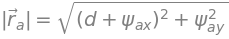

In [6]:
sym.Eq(sym.Symbol(r'|\vec{r}_a|'),r_a.magnitude() )

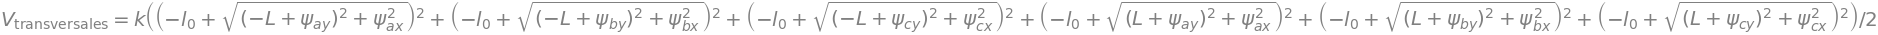

In [7]:
l_trans_1abajo = r_a - (d  *N.x - L* N.y)
l_trans_1arriba = r_a - (d * N.x + L* N.y)
l_trans_2abajo = r_b - (2* d *N.x - L* N.y)
l_trans_2arriba = r_b - (2* d *N.x + L* N.y)
l_trans_3abajo = r_c - (3* d *N.x - L* N.y)
l_trans_3arriba = r_c - (3* d *N.x + L* N.y)

V_trans_rhs= (k/2)* (
    (l_trans_1abajo.magnitude() - l0)**2 +
    (l_trans_1arriba.magnitude() - l0)**2 +
    (l_trans_2abajo.magnitude() - l0)**2 +
    (l_trans_2arriba.magnitude() - l0)**2 +
    (l_trans_3abajo.magnitude() - l0)**2 +
    (l_trans_3arriba.magnitude() - l0)**2
)
V_trans_lhs = sym.Symbol('V_\mathrm{transversales}')
V_trans = sym.Eq(V_trans_lhs, V_trans_rhs )
V_trans

Aquí si que vale la pena simplificar la expresión.

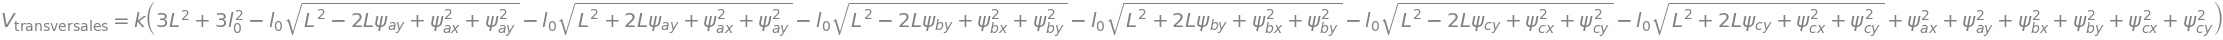

In [8]:
V_trans = sym.Eq(V_trans_lhs, V_trans_rhs.expand().simplify() )
V_trans

El monstruoso potencial del sistema es 

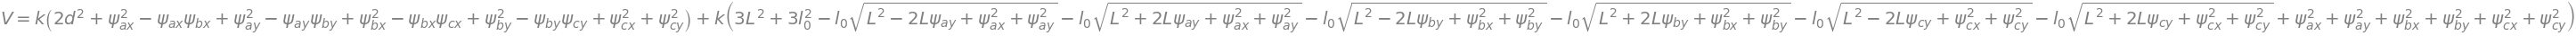

In [9]:
V = sym.Eq(sym.Symbol('V'), V_long.rhs+ V_trans.rhs )
V

Nuevamente, un poco de *embellecimiento*.

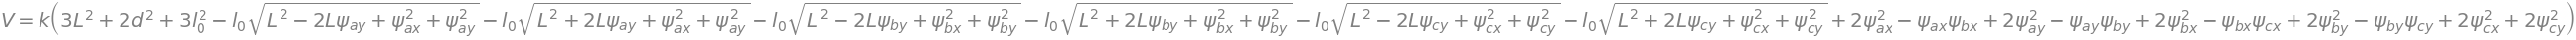

In [12]:
V = V.simplify()
V

## 2.a ley de Newton

Empiezo con la partícula 1.
En $\hat{x}$, $$
    m \ddot{\psi}_{ax} = - \frac{\partial}{\partial \psi_{ax}} V
$$

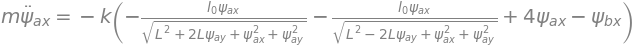

In [11]:
psia_x_2a = sym.Eq(m* psiax.diff(t, 2), - V.rhs.diff(psiax) )
psia_x_2a

Una vez más y no lo mostramos más.

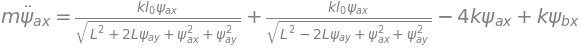

In [12]:
psia_x_2a.expand().simplify()

Ahora lo mismo para las restantes partículas y en ambas direcciones.

In [13]:
def segundaLey(variable):
    return sym.Eq(m* variable.diff(t, 2), - V.rhs.diff(variable) )

In [14]:
psib_x_2a = segundaLey(psibx)
psic_x_2a = segundaLey(psicx)

psia_y_2a = segundaLey(psiay)
psib_y_2a = segundaLey(psiby)
psic_y_2a = segundaLey(psicy)

### Linealización: Taylor a primer orden en el origen o serie de Maclaurin

Sabemos que esto hay que desarrollar en serie de Taylor a primer orden en función de todas las

In [15]:
variables = [psiax, psibx, psicx, psiay, psiby, psicy]
variables

In [16]:
taylor_subs ={
    psiax : 0,
    psiay : 0,
    psibx : 0,
    psiby : 0,
    psicx : 0,
    psicy : 0,
}
unMedio = sym.Rational(1,2)

segundaLey_rhs_1erOrden = psia_x_2a.rhs.subs(taylor_subs) + (
    + psia_x_2a.rhs.diff(psiax).subs(taylor_subs)* psiax
    + psia_x_2a.rhs.diff(psiay).subs(taylor_subs)* psiay
    + psia_x_2a.rhs.diff(psibx).subs(taylor_subs)* psibx
    + psia_x_2a.rhs.diff(psiby).subs(taylor_subs)* psiby
    + psia_x_2a.rhs.diff(psicx).subs(taylor_subs)* psicx
    + psia_x_2a.rhs.diff(psicy).subs(taylor_subs)* psicy
)
psia_x_2a1erOrden = sym.Eq(psia_x_2a.lhs, segundaLey_rhs_1erOrden)
psia_x_2a1erOrden

Se puede hacer lo propio con las otras partículas en las dos direcciones.
Programa una corta función automatiza identificar variables y evaluar en el origen la derivada respecto a ellas.

In [17]:
def maclaurin1erOrden(segundaLey):
    '''
    Desarrollo en serie de Taylor en torno al origen, o serie de Maclaurin, a primer orden en todas las variables.
    '''
    variables_set = segundaLey.atoms(sym.Function) # regresa un conjunto (set) de las funciones en la expresión  
    origenes = {variable : 0 for variable in variables_set} # diccionario de substituciones de cada variable por '0'
    segundaLey_rhs_1erOrden = segundaLey.rhs.subs(origenes) # Debe ser nula, sirve para verificar
    for variable in variables_set: 
        segundaLey_rhs_1erOrden += segundaLey.rhs.diff(variable).subs(origenes)* variable
    segundaLey_rhs_1erOrden = segundaLey_rhs_1erOrden.collect(variables_set) # collect agrupa lo que multiplica a su argumento
    return sym.Eq(segundaLey.lhs, segundaLey_rhs_1erOrden)

In [18]:
psia_y_2a1erOrden = maclaurin1erOrden(psia_y_2a)
psia_y_2a1erOrden

In [19]:
psia_y_2a1erOrden = maclaurin1erOrden(psia_y_2a)
psia_y_2a1erOrden

In [20]:
psib_x_2a1erOrden = maclaurin1erOrden(psib_x_2a)
psib_x_2a1erOrden

In [21]:
psib_y_2a1erOrden = maclaurin1erOrden(psib_y_2a)
psib_y_2a1erOrden

In [22]:
psic_x_2a1erOrden = maclaurin1erOrden(psic_x_2a)
psic_x_2a1erOrden

In [23]:
psic_y_2a1erOrden = maclaurin1erOrden(segundaLey = psic_y_2a)
psic_y_2a1erOrden

## Matríz \\(\mathbb{K'}\\)

$$
\begin{aligned}
m \ddot{\vec{\psi}} = \mathbb{K} \vec{\psi}\\
\ddot{\vec{\psi}} = \mathbb{K}' \vec{\psi}\\
\end{aligned}
$$
Teniendo $6$ grados de libertado $\mathbb{K}'$ tendría que ser un monstruo $6\times 6$.
Pero hemos visto que las ecuaciones de la 2.a ley de Newton en $\hat{x}$ están desacopladas de aquellas en $\hat{y}$.
Es decir las que van en $\hat{x}$ solo dependen de $\psi_{ix}$ y visceversa.

Agrupando las variables en $\vec{\psi}$ por dirección

In [24]:
vecPsi = sym.Eq(sym.Symbol(r'\vec{\psi}'), sym.Matrix(variables), evaluate= False )
vecPsi

             ⎡\psi_{ax}⎤
             ⎢         ⎥
             ⎢\psi_{bx}⎥
             ⎢         ⎥
             ⎢\psi_{cx}⎥
\vec{\psi} = ⎢         ⎥
             ⎢\psi_{ay}⎥
             ⎢         ⎥
             ⎢\psi_{by}⎥
             ⎢         ⎥
             ⎣\psi_{cy}⎦

el monstruo queda segmentado en cuatro bloques de $3 \times 3$, el superior izquierdo tendrá solo dependerá de lo que suceda en $\hat{x}$ y de $\hat{y}$ el inferior derecho.
El primero será el de oscilaciones longitudinales y el último el de transversales.

### Oscilaciones longitudinales

In [25]:
matK_long = sym.Eq(sym.Symbol(r"\mathbb{K}'_\mathrm{transversales}"),
                   (1/m)* sym.Matrix([
                       [psia_x_2a1erOrden.rhs.coeff(psiax), psia_x_2a1erOrden.rhs.coeff(psibx), psia_x_2a1erOrden.rhs.coeff(psicx)],
                       [psib_x_2a1erOrden.rhs.coeff(psiax), psib_x_2a1erOrden.rhs.coeff(psibx), psib_x_2a1erOrden.rhs.coeff(psicx)],
                       [psic_x_2a1erOrden.rhs.coeff(psiax), psic_x_2a1erOrden.rhs.coeff(psibx), psic_x_2a1erOrden.rhs.coeff(psicx)],
                   ] ),
                   evaluate= False
                  )
matK_long

                                     ⎡   ⎛    2⋅l₀⎞                           
                                     ⎢-k⋅⎜4 - ────⎟                           
                                     ⎢   ⎝     L  ⎠         k                 
                                     ⎢──────────────        ─               0 
                                     ⎢      m               m                 
                                     ⎢                                        
                                     ⎢                   ⎛    2⋅l₀⎞           
                                     ⎢                -k⋅⎜4 - ────⎟           
\mathbb{K}'_\mathrm{transversales} = ⎢      k            ⎝     L  ⎠         k 
                                     ⎢      ─         ──────────────        ─ 
                                     ⎢      m               m               m 
                                     ⎢                                        
                                     ⎢              

Ya vimos que `sympy` calcula la relación de amplitudes de cada modo y su $\omega^2$.

In [26]:
omega2autovectores_long = (-matK_long.rhs).eigenvects()
omega2autovectores_long

⎡⎛                   ⎡⎡-1⎤⎤⎞  ⎛                             ⎡⎡1 ⎤⎤⎞  ⎛        
⎢⎜4⋅L⋅k - 2⋅k⋅l₀     ⎢⎢  ⎥⎥⎟  ⎜-√2⋅L⋅k + 4⋅L⋅k - 2⋅k⋅l₀     ⎢⎢  ⎥⎥⎟  ⎜√2⋅L⋅k +
⎢⎜──────────────, 1, ⎢⎢0 ⎥⎥⎟, ⎜────────────────────────, 1, ⎢⎢√2⎥⎥⎟, ⎜────────
⎢⎜     L⋅m           ⎢⎢  ⎥⎥⎟  ⎜          L⋅m                ⎢⎢  ⎥⎥⎟  ⎜        
⎣⎝                   ⎣⎣1 ⎦⎦⎠  ⎝                             ⎣⎣1 ⎦⎦⎠  ⎝        

                    ⎡⎡ 1 ⎤⎤⎞⎤
 4⋅L⋅k - 2⋅k⋅l₀     ⎢⎢   ⎥⎥⎟⎥
───────────────, 1, ⎢⎢-√2⎥⎥⎟⎥
  L⋅m               ⎢⎢   ⎥⎥⎟⎥
                    ⎣⎣ 1 ⎦⎦⎠⎦

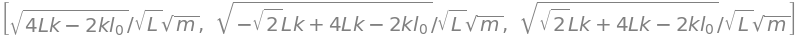

In [27]:
omegas_long = []
autovectores_long = []
for gdl in omega2autovectores_long:
    omegas_long.append(sym.sqrt(gdl[0] ) )
    autovectores_long.append(gdl[2] )
omegas_long

In [28]:
autovectores_long

⎡⎡⎡-1⎤⎤  ⎡⎡1 ⎤⎤  ⎡⎡ 1 ⎤⎤⎤
⎢⎢⎢  ⎥⎥  ⎢⎢  ⎥⎥  ⎢⎢   ⎥⎥⎥
⎢⎢⎢0 ⎥⎥, ⎢⎢√2⎥⎥, ⎢⎢-√2⎥⎥⎥
⎢⎢⎢  ⎥⎥  ⎢⎢  ⎥⎥  ⎢⎢   ⎥⎥⎥
⎣⎣⎣1 ⎦⎦  ⎣⎣1 ⎦⎦  ⎣⎣ 1 ⎦⎦⎦

### Oscilaciones transversales

In [29]:
matK_trans = sym.Eq(sym.Symbol("\mathbb{K}'_\mathrm{transversales}"),
                   (1/m)* sym.Matrix([
                       [psia_y_2a1erOrden.rhs.coeff(psiay), psia_y_2a1erOrden.rhs.coeff(psiby), psia_y_2a1erOrden.rhs.coeff(psicy)],
                       [psib_y_2a1erOrden.rhs.coeff(psiay), psib_y_2a1erOrden.rhs.coeff(psiby), psib_y_2a1erOrden.rhs.coeff(psicy)],
                       [psic_y_2a1erOrden.rhs.coeff(psiay), psic_y_2a1erOrden.rhs.coeff(psiby), psic_y_2a1erOrden.rhs.coeff(psicy)],
                   ] ),
                   evaluate= False
                  )
matK_trans

                                     ⎡-4⋅k     k         ⎤
                                     ⎢─────    ─      0  ⎥
                                     ⎢  m      m         ⎥
                                     ⎢                   ⎥
                                     ⎢  k    -4⋅k     k  ⎥
\mathbb{K}'_\mathrm{transversales} = ⎢  ─    ─────    ─  ⎥
                                     ⎢  m      m      m  ⎥
                                     ⎢                   ⎥
                                     ⎢         k    -4⋅k ⎥
                                     ⎢  0      ─    ─────⎥
                                     ⎣         m      m  ⎦

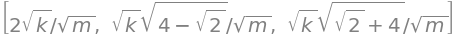

In [30]:
omega2autovectores_trans = (-matK_trans.rhs).eigenvects()
omegas_trans = []
autovectores_trans = []
for gdl in omega2autovectores_trans:
    omegas_trans.append(sym.sqrt(gdl[0] ) )
    autovectores_trans.append(gdl[2] )
omegas_trans

In [31]:
autovectores_trans

⎡⎡⎡-1⎤⎤  ⎡⎡1 ⎤⎤  ⎡⎡ 1 ⎤⎤⎤
⎢⎢⎢  ⎥⎥  ⎢⎢  ⎥⎥  ⎢⎢   ⎥⎥⎥
⎢⎢⎢0 ⎥⎥, ⎢⎢√2⎥⎥, ⎢⎢-√2⎥⎥⎥
⎢⎢⎢  ⎥⎥  ⎢⎢  ⎥⎥  ⎢⎢   ⎥⎥⎥
⎣⎣⎣1 ⎦⎦  ⎣⎣1 ⎦⎦  ⎣⎣ 1 ⎦⎦⎦